In [3]:
from captcha.image import ImageCaptcha
import random

# Create an instance of ImageCaptcha
image = ImageCaptcha()

# Function to add noise (lines and dots)
# def add_noise(draw, width, height):
#     for _ in range(10):  # Number of lines
#         start = (random.randint(0, width), random.randint(0, height))
#         end = (random.randint(0, width), random.randint(0, height))
#         draw.line([start, end], fill='black', width=1)

#     for _ in range(20):  # Number of dots
#         x = random.randint(0, width)
#         y = random.randint(0, height)
#         draw.ellipse([x, y, x + 3, y + 3], fill='black')

# Generate CAPTCHA text
captcha_text = 'ABCD'

# Generate the CAPTCHA image
image_data = image.generate(captcha_text)

# Save the generated CAPTCHA image
image.write(captcha_text, 'captcha_with_noise.png')


In [ ]:
##NOT THIS
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

image_dir = r'C:\Users\daims\Desktop\scalable computing\project_2\captchas'

image_files = os.listdir(image_dir)

for file in image_files[10:15]:
    print(file)
    image_path = os.path.join(image_dir, file)
    # Load the CAPTCHA image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply Gaussian Blur to reduce noise
    blurred = cv2.GaussianBlur(image, (5, 5),0)

    # Use thresholding to create a binary image
    _, binary = cv2.threshold(blurred, 190, 255, cv2.THRESH_BINARY)
    
    kernel = np.ones((3, 3), np.uint8)  # You can adjust the kernel size if needed
    eroded = cv2.erode(binary, kernel, iterations=1)  # Erode the image

    # Use morphological operations to remove small spots
    kernel = np.ones((5, 5), np.uint8)
    cleaned = cv2.morphologyEx(eroded, cv2.MORPH_OPEN, kernel)
    
    
    # # Find contours of the characters
    # contours, _ = cv2.findContours(cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # # Create a directory to save segmented characters
    # segmented_dir = os.path.join(image_dir, 'segmented')
    # os.makedirs(segmented_dir, exist_ok=True)

    # # Iterate through each contour and save the segmented characters
    # for i, contour in enumerate(contours):
    #     x, y, w, h = cv2.boundingRect(contour)
    #     character = binary[y:y + h, x:x + w]

    #     # Save or display the segmented character
    #     cv2.imwrite(os.path.join(segmented_dir, f'{file[:-4]}_char_{i}.png'), character)


    # Save or display the cleaned image
    # cv2.imwrite('cleaned_captcha.png', cleaned)

    # Optional: Display the images
    plt.figure(figsize=(12,12))
    plt.subplot(121)
    plt.imshow( cv2.cvtColor(image, cv2.COLOR_BGR2RGB),)
    plt.subplot(122)
    # plt.figure()
    plt.imshow( cleaned,cmap='gray')
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()


In [339]:
def remove_circles(img,_minDist=1, _param1=50, _param2=5, _minRadius=0, _maxRadius=2):
    # pic=img.copy()
    hough_circle_locations = cv2.HoughCircles(img, method=cv2.HOUGH_GRADIENT, dp=1, minDist=_minDist, param1=_param1, param2=_param2, minRadius=_minRadius, maxRadius=_maxRadius)
    if hough_circle_locations is not None:
        circles = hough_circle_locations[0]
        for circle in circles:
            x = int(circle[0])
            y = int(circle[1])
            r = int(circle[2])
            surrounding_region1 = img[
            max(y - r - 1, 0):max(y - r, 0),
            max(x - r - 1, 0):max(x - r, 0)]
            # surrounding_region2 = img[
            # max(y + r , 0):max(y + r+1, 0),
            # max(x + r , 0):max(x + r+1, 0)]
            # print(type(surrounding_region1))
            # print(surrounding_region2.shape)
            # # Calculate the average color of the surrounding region
            average_color = cv2.mean(surrounding_region1)[:3]  # Get BGR values np.concatenate((surrounding_region1,surrounding_region2
            img = cv2.circle(img, center=(x, y), radius=r, color=average_color, thickness=2)#surrounding_color.tolist()
    return img

In [328]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Define the directory containing the images
image_dir = r'C:\Users\daims\Desktop\scalable computing\project_2\captchas'
image_files = os.listdir(image_dir)
base_save_path=r'C:\Users\daims\Desktop\scalable computing\project_2\segmented'
os.makedirs(base_save_path, exist_ok=True)


# Process each image
for idx,file in enumerate(image_files):
    # print(file)

    # Create the full path to the image file
    image_path = os.path.join(image_dir, file)

    # Load the CAPTCHA image
    image = cv2.imread(image_path)
    
    # Check if the image was loaded successfully
    if image is None:
        print(f"Failed to load image: {image_path}")
        continue

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    no_circles=remove_circles(gray)
    _, binary = cv2.threshold(no_circles, 180, 255, cv2.THRESH_BINARY_INV)
    # plt.figure()
    # plt.imshow(binary,cmap='gray')
    # blurred = cv2.GaussianBlur(no_circles, (5, 5), 0)

    
    # binary = cv2.dilate(binary, np.ones((3, 3), np.uint8), iterations=1) # Erosion for cleanup
    # # # binary = median_blur_rectangular(img, 5, 1)
    # binary = cv2.erode(binary, np.ones((3, 3), np.uint8), iterations=2) # Dilate image to make it look like the original
    # binary = cv2.dilate(binary, np.ones((3, 3), np.uint8), iterations=1) # Erode for final cleanup
    
    gradient = cv2.morphologyEx(binary, cv2.MORPH_GRADIENT, (500,500))

    rst=binary
    #uncomment here to try segment function
    # p=segment(rst)
    # for o in p:
    #     plt.figure()
    #     plt.imshow(o)
    
# Uncomment here for mser
    # Create MSER detector
    mser = cv2.MSER_create()

    # Detect MSER regions
    regions, _ = mser.detectRegions(rst)

    # Create a directory to save segmented characters
    segmented_dir = os.path.join(base_save_path, f'image_{idx+1}')
    os.makedirs(segmented_dir, exist_ok=True)

    # Set a minimum contour area to filter out small regions
    min_area = 100  # Adjust this value based on your images

    # Iterate through each MSER region
    for i, region in enumerate(regions):
        # Get bounding box for the region
        x, y, w, h = cv2.boundingRect(region)
        area = w * h
        
        # Filter by area
        if area > min_area:
            # Extract the character
            character = rst[y:y + h, x:x + w]
            
            if (character.shape[0]>=100) or (character.shape[1]>=100):
                print(character.shape)
                resized_image = cv2.resize(image, (100, 100))
                resized_image=cv2.cvtColor(resized_image,cv2.COLOR_BGR2GRAY)
                no_circles=remove_circles(resized_image,_minDist=0.1,_param1=1000,_param2=900,_minRadius=0,_maxRadius=1)
                _, binary = cv2.threshold(no_circles, 160, 255, cv2.THRESH_BINARY_INV)
                print(binary.shape)
            # plt.figure()
            # plt.imshow(character)
            # exit(1)
        
            # Save or display the segmented character
            # cv2.imwrite(os.path.join(segmented_dir, f'{file[:-4]}_char_{i}.png'), character)

    # # Optional: Display the original and processed images
    # plt.figure(figsize=(12, 6))
    
    # plt.subplot(121)
    # plt.title('Original Image')
    # plt.imshow(image)

    # plt.subplot(122)
    # plt.title('Binary Image with MSER Regions')
    # plt.imshow(rst, cmap='gray')
    # plt.show()


001fa47fbed65fc0d011f22a207e1b6b0572703d.png
0034adb19e716e2e6e7140607462f8687fabefe4.png
006b0384cb9770a0e4b3cfd3f538e22ab642f1a4.png
(1, 123)
006fbea1a54cd9b3b76cce8ef11a7641061de8e3.png
00998cc24fbddab58a46433237c41ef741e9acd6.png
009b045e4aa03e7931ad2247eeb3f2917ffa04fa.png
00c2b9d5159fe336f0ac53f24054796c007254e1.png
00dbf0089b90d18d02feeb118cfd38630d60d543.png
(66, 115)
00e1f634cd5cdeb4cf49f618125a5146a120bf78.png
00f1c44fe00419c8ac575136ac64ffaa3400d8fb.png
(48, 129)
00ff440f69c144e3d15365ab5efed9e1e0456b13.png
010b90771fe8953a2f84196d983b172b51db4379.png
(94, 190)
012aaf560a13ca116b69194090023173e7f62ad1.png
014eabe18aba972cb524c2af24d95528a37312d2.png
017e0e72c288afa2523886ba46ba5e0021464bdb.png
0187cccc1a456bdb53feb84743d0fe3515364242.png
0193a1b094ca227635a5d8aa4c25a1eaf5a827e8.png
01aba8120341a046d07cfe396a3959cd098dde6f.png
(58, 164)
01acc9bbfd9ed6a937938cf2c357f4996bf4b883.png
01b9548585011ffb73bc9f1d97cf59efce31a7ab.png
01ce2c7cc46a89372b5b75746d634bdabe05ad98.png
01e4e2

In [198]:
def resize_and_center_image(img, target_size=(100, 100)):
    # Get current size of the character image
    h, w = img.shape[:2]
    
    # Create a new blank image with the target size and fill it with white (background)
    new_img = np.ones(target_size, dtype=np.uint8) * 255  # Assuming background is white
    
    # Compute the offset to center the image
    x_offset = (target_size[1] - w) // 2
    y_offset = (target_size[0] - h) // 2
    
    # Place the character image in the center of the new image
    new_img[y_offset:y_offset + h, x_offset:x_offset + w] = img
    
    return new_img

In [202]:
def segment(cleaned, two_char_min=40 , three_char_min=60, four_char_min=80, index = 0, visualize=True, visualization_dir=base_save_path+'visualizations'):
    os.makedirs(visualization_dir, exist_ok=True)
    
    _, thresh = cv2.threshold(cleaned, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    dist_transform = cv2.distanceTransform(thresh, cv2.DIST_L2, 5)
    dist_transform = cv2.normalize(dist_transform, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    _, sure_fg = cv2.threshold(dist_transform, 0.5 * dist_transform.max(), 255, 0)
    kernel = np.ones((3, 3), np.uint8)
    sure_bg = cv2.dilate(thresh, kernel, iterations=5)
    
    # Subtract the sure foreground from the sure background to get the unknown region
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)
    
    _, markers = cv2.connectedComponents(sure_fg)
    markers = markers + 1
    markers[unknown == 255] = 0
    markers = cv2.watershed(cv2.cvtColor(cleaned, cv2.COLOR_GRAY2BGR), markers)
    
    # Generate character segments using contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Initialize a list to store character images with their x-coordinates
    char_images_with_positions = []
    
    for idx, cnt in enumerate(contours):
        x, y, w, h = cv2.boundingRect(cnt)
        # Remove characters that are likely just noise
        if w > 6 and h > 6:
            char_image = cleaned[y:y+h, x:x+w]
            if w > 40 and w <= 70:
                # This is likely an image that has two overlapping characters
                column_sums = np.sum(char_image == 0, axis=0)
                padding_value = 0.3
                margin_length = int(char_image.shape[1] * padding_value)
                
                new_interval_start = margin_length
                new_interval_end = char_image.shape[1] - margin_length
                
                # Ensure indices are valid
                if new_interval_start >= new_interval_end:
                    new_interval_start = 0
                    new_interval_end = char_image.shape[1]
                
                # Find the optimal split column
                sub_column_sums = column_sums[new_interval_start:new_interval_end]
                divider_offset = np.argmin(sub_column_sums) + new_interval_start
                
                # Visualization
                if visualize:
                    vis_image = cv2.cvtColor(char_image, cv2.COLOR_GRAY2BGR)
                    h_img = char_image.shape[0]
                    # Draw margin lines (in red)
                    cv2.line(vis_image, (new_interval_start, 0), (new_interval_start, h_img), (0, 0, 255), 1)
                    cv2.line(vis_image, (new_interval_end, 0), (new_interval_end, h_img), (0, 0, 255), 1)
                    # Draw split line (in green)
                    cv2.line(vis_image, (divider_offset, 0), (divider_offset, h_img), (0, 255, 0), 1)
                    # Save the visualization image
                    vis_filename = f'visualization_{index}_{idx}.png'
                    vis_output_path = os.path.join(visualization_dir, vis_filename)
                    cv2.imwrite(vis_output_path, vis_image)
                
                # Split the image at the divider offset
                left_char = char_image[:, :divider_offset]
                right_char = char_image[:, divider_offset:]
                
                # Adjust x-coordinates for split characters
                left_x = x
                right_x = x + divider_offset
                
                # Append the resized and centered images along with their x-coordinates
                char_images_with_positions.append((left_x, resize_and_center_image(left_char)))
                char_images_with_positions.append((right_x, resize_and_center_image(right_char)))
            elif w > 70 and w <= 100:
                # This is likely an image with three overlapping characters
                column_sums = np.sum(char_image == 0, axis=0)
                # padding_value = 0.2
                padding_value = 0.15
                w_img = char_image.shape[1]
                h_img = char_image.shape[0]
                
                # First divider
            # first_split_pos = int(w_img * 0.25)
                first_split_pos = int(w_img / 3)
                first_search_start = max(0, int(first_split_pos - w_img * padding_value))
                first_search_end = min(w_img, int(first_split_pos + w_img * padding_value))
                first_sub_column_sums = column_sums[first_search_start:first_search_end]
                first_divider_offset = np.argmin(first_sub_column_sums) + first_search_start

                # Second divider
            # second_split_pos = int(w_img * 0.75)
                second_split_pos = int(2 * w_img / 3)
                second_search_start = max(0, int(second_split_pos - w_img * padding_value))
                second_search_end = min(w_img, int(second_split_pos + w_img * padding_value))
                second_sub_column_sums = column_sums[second_search_start:second_search_end]
                second_divider_offset = np.argmin(second_sub_column_sums) + second_search_start

                # Visualization
                if visualize:
                    vis_image = cv2.cvtColor(char_image, cv2.COLOR_GRAY2BGR)
                    # Draw estimated split positions (yellow lines)
                    cv2.line(vis_image, (first_split_pos, 0), (first_split_pos, h_img), (0, 255, 255), 1)
                    cv2.line(vis_image, (second_split_pos, 0), (second_split_pos, h_img), (0, 255, 255), 1)
                    # Draw search areas (blue lines)
                    cv2.line(vis_image, (first_search_start, 0), (first_search_start, h_img), (255, 0, 0), 1)
                    cv2.line(vis_image, (first_search_end, 0), (first_search_end, h_img), (255, 0, 0), 1)
                    cv2.line(vis_image, (second_search_start, 0), (second_search_start, h_img), (255, 0, 0), 1)
                    cv2.line(vis_image, (second_search_end, 0), (second_search_end, h_img), (255, 0, 0), 1)
                    # Draw split lines (green lines)
                    cv2.line(vis_image, (first_divider_offset, 0), (first_divider_offset, h_img), (0, 255, 0), 1)
                    cv2.line(vis_image, (second_divider_offset, 0), (second_divider_offset, h_img), (0, 255, 0), 1)
                    # Save the visualization image
                    vis_filename = f'visualization_{index}_{idx}.png'
                    vis_output_path = os.path.join(visualization_dir, vis_filename)
                    cv2.imwrite(vis_output_path, vis_image)
                
                # Split the image at the divider offsets
                first_char = char_image[:, :first_divider_offset]
                second_char = char_image[:, first_divider_offset:second_divider_offset]
                third_char = char_image[:, second_divider_offset:]
                
                # Adjust x-coordinates for split characters
                first_x = x
                second_x = x + first_divider_offset
                third_x = x + second_divider_offset
                
                # Append the resized and centered images along with their x-coordinates
                char_images_with_positions.append((first_x, resize_and_center_image(first_char)))
                char_images_with_positions.append((second_x, resize_and_center_image(second_char)))
                char_images_with_positions.append((third_x, resize_and_center_image(third_char)))
            
            elif w > 100:
                # This is likely an image with four overlapping characters
                column_sums = np.sum(char_image == 0, axis=0)
                padding_value = 0.1
                w_img = char_image.shape[1]
                h_img = char_image.shape[0]
                
                # First divider
                first_split_pos = int(w_img / 4)
                first_search_start = max(0, int(first_split_pos - w_img * padding_value))
                first_search_end = min(w_img, int(first_split_pos + w_img * padding_value))
                first_sub_column_sums = column_sums[first_search_start:first_search_end]
                first_divider_offset = np.argmin(first_sub_column_sums) + first_search_start

                # Second divider
                second_split_pos = int(w_img / 2)
                second_search_start = max(0, int(second_split_pos - w_img * padding_value))
                second_search_end = min(w_img, int(second_split_pos + w_img * padding_value))
                second_sub_column_sums = column_sums[second_search_start:second_search_end]
                second_divider_offset = np.argmin(second_sub_column_sums) + second_search_start

                # Third divider
                third_split_pos = int(3 * w_img / 4)
                third_search_start = max(0, int(third_split_pos - w_img * padding_value))
                third_search_end = min(w_img, int(third_split_pos + w_img * padding_value))
                third_sub_column_sums = column_sums[third_search_start:third_search_end]
                third_divider_offset = np.argmin(third_sub_column_sums) + third_search_start

                # Visualization
                if visualize:
                    vis_image = cv2.cvtColor(char_image, cv2.COLOR_GRAY2BGR)
                    # Draw estimated split positions (yellow lines)
                    cv2.line(vis_image, (first_split_pos, 0), (first_split_pos, h_img), (0, 255, 255), 1)
                    cv2.line(vis_image, (second_split_pos, 0), (second_split_pos, h_img), (0, 255, 255), 1)
                    cv2.line(vis_image, (third_split_pos, 0), (third_split_pos, h_img), (0, 255, 255), 1)
                    # Draw search areas (blue lines)
                    cv2.line(vis_image, (first_search_start, 0), (first_search_start, h_img), (255, 0, 0), 1)
                    cv2.line(vis_image, (first_search_end, 0), (first_search_end, h_img), (255, 0, 0), 1)
                    cv2.line(vis_image, (second_search_start, 0), (second_search_start, h_img), (255, 0, 0), 1)
                    cv2.line(vis_image, (second_search_end, 0), (second_search_end, h_img), (255, 0, 0), 1)
                    cv2.line(vis_image, (third_search_start, 0), (third_search_start, h_img), (255, 0, 0), 1)
                    cv2.line(vis_image, (third_search_end, 0), (third_search_end, h_img), (255, 0, 0), 1)
                    # Draw split lines (green lines)
                    cv2.line(vis_image, (first_divider_offset, 0), (first_divider_offset, h_img), (0, 255, 0), 1)
                    cv2.line(vis_image, (second_divider_offset, 0), (second_divider_offset, h_img), (0, 255, 0), 1)
                    cv2.line(vis_image, (third_divider_offset, 0), (third_divider_offset, h_img), (0, 255, 0), 1)
                    # Save the visualization image
                    vis_filename = f'visualization_{index}_{idx}.png'
                    vis_output_path = os.path.join(visualization_dir, vis_filename)
                    cv2.imwrite(vis_output_path, vis_image)
                
                # Split the image at the divider offsets
                first_char = char_image[:, :first_divider_offset]
                second_char = char_image[:, first_divider_offset:second_divider_offset]
                third_char = char_image[:, second_divider_offset:third_divider_offset]
                fourth_char = char_image[:, third_divider_offset:]
                
                # Adjust x-coordinates for split characters
                first_x = x
                second_x = x + first_divider_offset
                third_x = x + second_divider_offset
                fourth_x = x + third_divider_offset
                
                # Append the resized and centered images along with their x-coordinates
                char_images_with_positions.append((first_x, resize_and_center_image(first_char)))
                char_images_with_positions.append((second_x, resize_and_center_image(second_char)))
                char_images_with_positions.append((third_x, resize_and_center_image(third_char)))
                char_images_with_positions.append((fourth_x, resize_and_center_image(fourth_char)))
            else:
                # For single character images
                char_images_with_positions.append((x, resize_and_center_image(char_image)))
    
    # Sort the character images based on their x-coordinate to maintain order
    char_images_with_positions.sort(key=lambda tup: tup[0])
    char_images = [img for x_pos, img in char_images_with_positions]
    
    return char_images

[array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 25

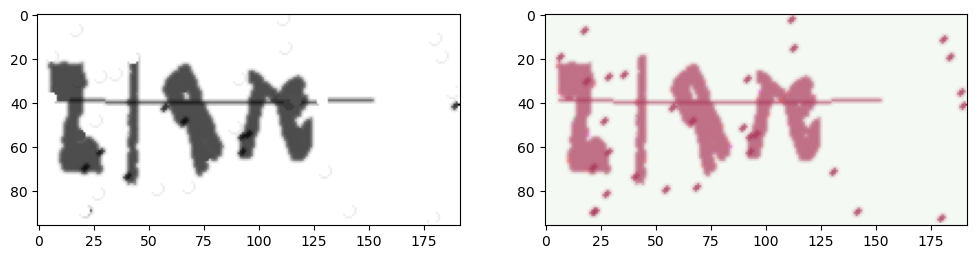

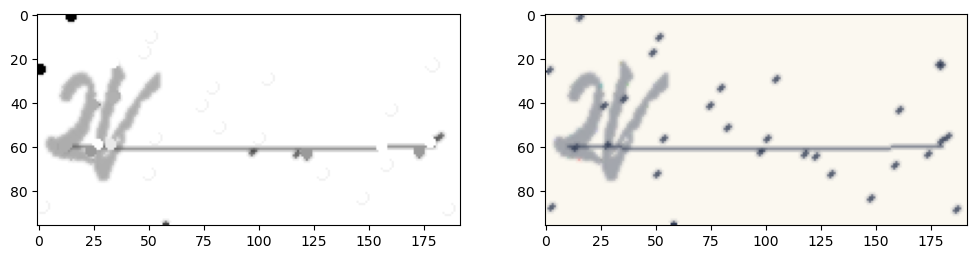

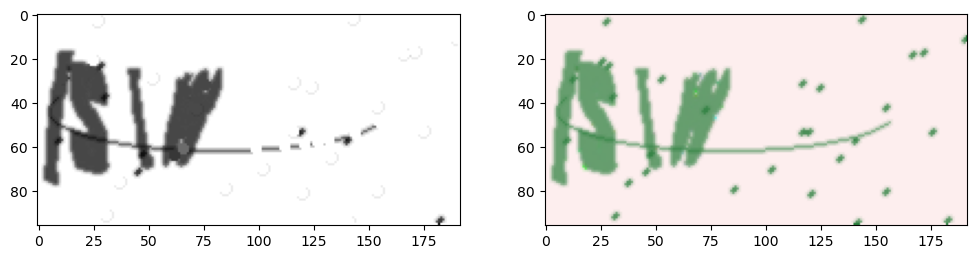

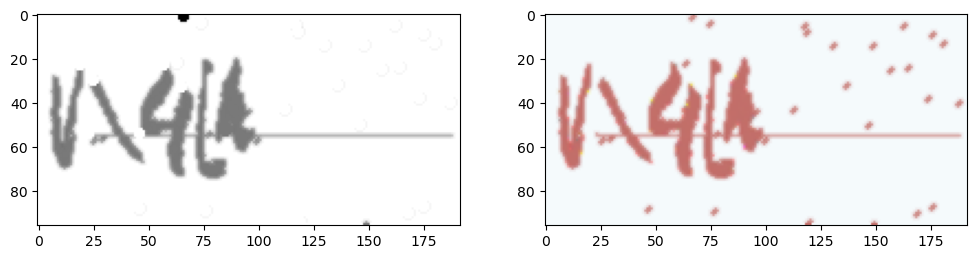

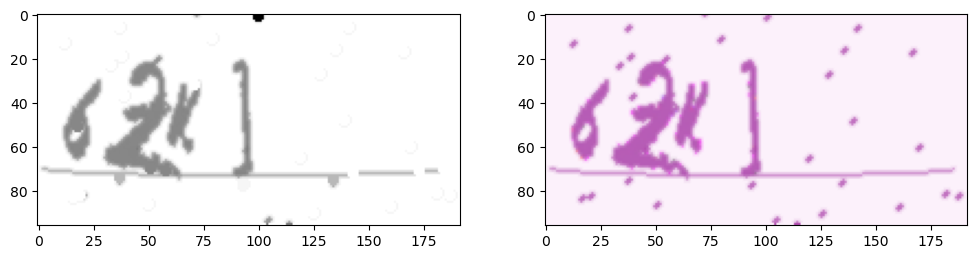

In [224]:
image_dir = r'C:\Users\daims\Desktop\scalable computing\project_2\captchas'
image_files = os.listdir(image_dir)

# Process each image
for file in image_files[90:95]:
    image_path = os.path.join(image_dir, file)

    # Load the CAPTCHA image
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # print(gray)
    nocir = remove_circles(gray)
    plt.figure(figsize=(12,12))
    plt.subplot(121)
    plt.imshow( nocir,cmap='gray')
    plt.subplot(122)
    plt.imshow( img,cmap='gray') 


In [333]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

# Define the directory containing the images
train_dir = r'C:\Users\daims\Desktop\scalable computing\project_2\captchas'
char_files = os.listdir(train_dir)
base_save_path=r'C:\Users\daims\Desktop\scalable computing\project_2\segmented'
os.makedirs(base_save_path, exist_ok=True)


# Process each image
for char in char_files:
    print(char)
    char_dir=os.path.join(train_dir,char)
    image_files = os.listdir(char_dir)
    print(image_files)
    for pic in image_files:
        # Create the full path to the image file
        image_path = os.path.join(char_dir,pic)

        # Load the CAPTCHA image
        image = cv2.imread(image_path)
        
        # Check if the image was loaded successfully
        if image is None:
            print(f"Failed to load image: {image_path}")
            continue

        # Convert to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        no_circles=remove_circles(gray)
        _, binary = cv2.threshold(no_circles, 180, 255, cv2.THRESH_BINARY_INV)

        gradient = cv2.morphologyEx(binary, cv2.MORPH_GRADIENT, (500,500))

        rst=binary

        mser = cv2.MSER_create()

        # Detect MSER regions
        regions, _ = mser.detectRegions(rst)

        segmented_dir = os.path.join(base_save_path, f'image_{idx+1}')
        os.makedirs(segmented_dir, exist_ok=True)

        # Set a minimum contour area to filter out small regions
        min_area = 100  # Adjust this value based on your images

        # Iterate through each MSER region
        for i, region in enumerate(regions):
            # Get bounding box for the region
            x, y, w, h = cv2.boundingRect(region)
            area = w * h
            
            # Filter by area
            if area > min_area:
                # Extract the character
                character = rst[y:y + h, x:x + w]
                # background = np.zeros((100, 100), dtype=np.uint8)

                # # Define the starting point (top-left corner) where you want to paste the image
                # x_offset = 5  # Adjust as needed
                # y_offset = 0  # Adjust as needed

                # # Ensure the input image fits within the background
                # height, width = character.shape
                # if x_offset + width <= 100 and y_offset + height <= 100:
                #     # Paste the input image onto the background
                #     background[y_offset:y_offset + height, x_offset:x_offset + width] = character
                # else:
                #     print("Input image is too large to paste onto the background.")
                if (character.shape[0]>=100) or (character.shape[1]>=100):
                    resized_image = cv2.resize(image, (100, 100))
                    resized_image=cv2.cvtColor(resized_image,cv2.COLOR_BGR2GRAY)
                    no_circles=remove_circles(resized_image,_minDist=0.1,_param1=1000,_param2=900,_minRadius=0,_maxRadius=1)
                    _, binary = cv2.threshold(no_circles, 160, 255, cv2.THRESH_BINARY_INV)
                    print(binary.shape)
                # plt.figure()
                # plt.imshow(background,cmap='gray')
        
    

001fa47fbed65fc0d011f22a207e1b6b0572703d.png


NotADirectoryError: [WinError 267] The directory name is invalid: 'C:\\Users\\daims\\Desktop\\scalable computing\\project_2\\captchas\\001fa47fbed65fc0d011f22a207e1b6b0572703d.png'

6character shape(66, 115)
resized shape(100, 100)
8character shape(48, 129)
resized shape(100, 100)
10character shape(94, 190)
resized shape(100, 100)
16character shape(58, 164)
resized shape(100, 100)


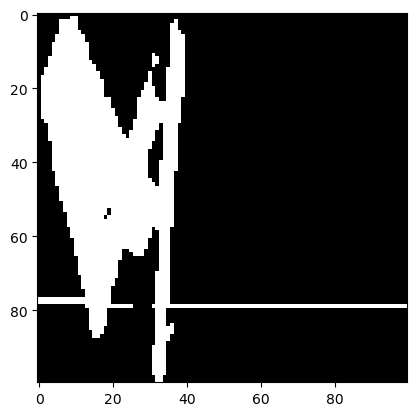

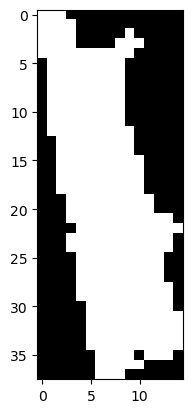

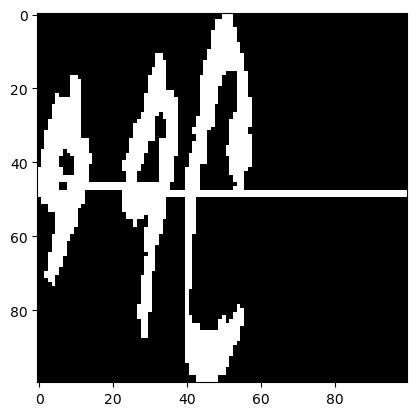

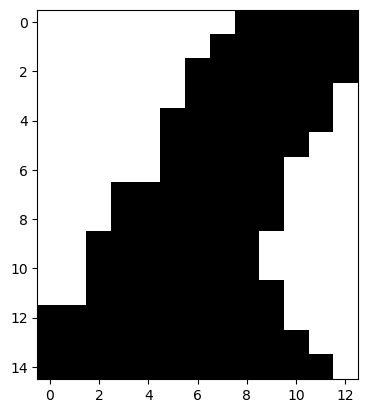

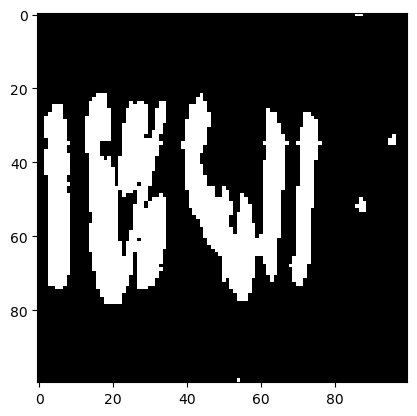

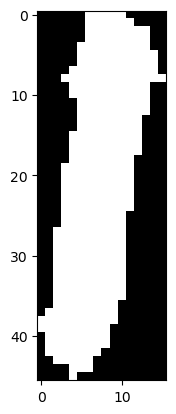

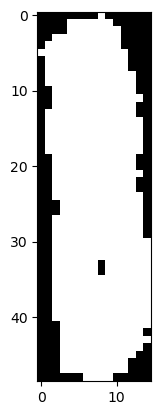

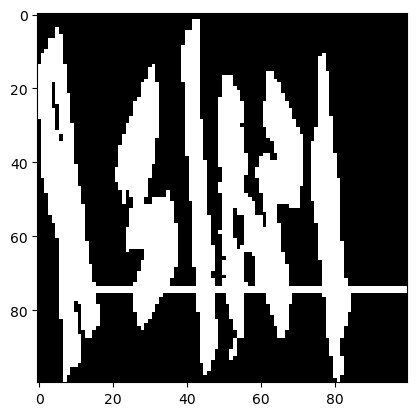

In [373]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import argparse

def remove_circles(img,_minDist=1, _param1=50, _param2=5, _minRadius=0, _maxRadius=2):
    # pic=img.copy()
    hough_circle_locations = cv2.HoughCircles(img, method=cv2.HOUGH_GRADIENT, dp=1, minDist=_minDist, param1=_param1, param2=_param2, minRadius=_minRadius, maxRadius=_maxRadius)
    if hough_circle_locations is not None:
        circles = hough_circle_locations[0]
        for circle in circles:
            x = int(circle[0])
            y = int(circle[1])
            r = int(circle[2])
            surrounding_region1 = img[
            max(y - r - 1, 0):max(y - r, 0),
            max(x - r - 1, 0):max(x - r, 0)]
            # surrounding_region2 = img[
            # max(y + r , 0):max(y + r+1, 0),
            # max(x + r , 0):max(x + r+1, 0)]
            # print(type(surrounding_region1))
            # print(surrounding_region2.shape)
            # # Calculate the average color of the surrounding region
            average_color = cv2.mean(surrounding_region1)[:3]  # Get BGR values np.concatenate((surrounding_region1,surrounding_region2
            img = cv2.circle(img, center=(x, y), radius=r, color=average_color, thickness=2)#surrounding_color.tolist()
    return img

def main():

        
    # Define the directory containing the images
    image_dir = r'C:\Users\daims\Desktop\scalable computing\project_2\captchas'
    image_files = os.listdir(image_dir)
    base_save_path=r'C:\Users\daims\Desktop\scalable computing\project_2\segmented_test'
    os.makedirs(base_save_path, exist_ok=True)

    # Process each image
    for idx,file in enumerate(image_files[1:20]):
        # print(file)

        # Create the full path to the image file
        image_path = os.path.join(image_dir, file)

        # Load the CAPTCHA image
        image = cv2.imread(image_path)
        
        # Check if the image was loaded successfully
        if image is None:
            print(f"Failed to load image: {image_path}")
            continue

        # Convert to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        no_circles=remove_circles(gray)
        _, binary = cv2.threshold(no_circles, 180, 255, cv2.THRESH_BINARY_INV)
        gradient = cv2.morphologyEx(binary, cv2.MORPH_GRADIENT, (500,500))

        rst=binary

        # Create MSER detector
        mser = cv2.MSER_create()

        # Detect MSER regions
        regions, _ = mser.detectRegions(rst)

        
        # Create a directory to save segmented characters for testing
        segmented_dir = os.path.join(base_save_path, f'image_{idx+1}')
        os.makedirs(segmented_dir, exist_ok=True)
        # Set a minimum contour area to filter out small regions
        min_area = 100  # Adjust this value based on your images
        # Iterate through each MSER region
        for i, region in enumerate(regions):
            # Get bounding box for the region
            x, y, w, h = cv2.boundingRect(region)
            area = w * h                
            # Filter by area
            if area > min_area:
                # Extract the character
                character = rst[y:y + h, x:x + w]
                # Save or display the segmented character                    
                # print("Preprocessing for test imgs")
                if(character.shape[0]==1) or (character.shape[1]==1):
                    continue
                elif (character.shape[0]>=100) or (character.shape[1]>=100):
                    
                    print(f'{idx}'+'character shape'+f'{character.shape}')
                    resized_image = cv2.resize(character, (100, 100))
                    print('resized shape'+f'{resized_image.shape}')
                    # resized_image=cv2.cvtColor(resized_image,cv2.COLOR_BGR2GRAY)
                    no_circles=remove_circles(resized_image,_minDist=0.1,_param1=1000,_param2=900,_minRadius=0,_maxRadius=1)
                    _, binary = cv2.threshold(no_circles, 160, 255, cv2.THRESH_BINARY)
                    plt.figure()
                    plt.imshow(binary,cmap='gray')
                    secondMser(rst)
                    # cv2.imwrite(os.path.join(segmented_dir, f'{file[:-4]}_char_{i}.png'), binary)
                    
                # else:
                #     background=addBackground(character)
                #     cv2.imwrite(os.path.join(segmented_dir, f'{file[:-4]}_char_{i}.png'), background)
       
                
if __name__ == '__main__':
    main()
    
    




In [44]:
def secondMser(file,segmented_dir,rst):

    mser = cv2.MSER_create()
    mser.setDelta(1)
    mser.setMaxArea(1500)
    mser.setMinDiversity(0.1) 

    # Detect MSER regions
    regions, _ = mser.detectRegions(rst)
    min_area = 200  # Adjust this value based on your images
    bounding_boxes = []
    # min_area = 100

    for region in regions:
        x, y, w, h = cv2.boundingRect(region)
        area = w * h
        if area > min_area:
            bounding_boxes.append((x, y, w, h))

    # Filter out overlapping bounding boxes
    non_overlapping_boxes = []
    for i in range(len(bounding_boxes)):
        add_box = True
        for j in range(len(non_overlapping_boxes)):
            if overlap(bounding_boxes[i], non_overlapping_boxes[j]):
                add_box = False
                break
        if add_box:
            non_overlapping_boxes.append(bounding_boxes[i])
    
    non_overlapping_boxes.sort(key=lambda box: box[0])  # box[0] is the x-coordinate


    for i, (x, y, w, h) in enumerate(non_overlapping_boxes):
        character = rst[y:y + h, x:x + w]
        if (character.shape[0] == 1) or (character.shape[1] == 1):
            continue
        background = pad_character(character)
        
        plt.figure()
        plt.subplot(131)
        plt.imshow(background,cmap='gray')
        # cv2.imwrite(os.path.join(segmented_dir, f'{file[:-4]}_char_{i}.png'), background)

            

In [45]:
def overlap(box1, box2, threshold=0.3):
    # Calculate the intersection area
    x1, y1, w1, h1 = box1
    x2, y2, w2, h2 = box2
    
    xx1 = max(x1, x2)
    yy1 = max(y1, y2)
    xx2 = min(x1 + w1, x2 + w2)
    yy2 = min(y1 + h1, y2 + h2)
    
    if xx2 - xx1 > 0 and yy2 - yy1 > 0:  # If there is an intersection
        inter_area = (xx2 - xx1) * (yy2 - yy1)
        # Calculate the area of both boxes
        box1_area = w1 * h1
        box2_area = w2 * h2
        # Calculate the overlap ratio
        overlap_ratio = inter_area / float(box1_area + box2_area - inter_area)
        return overlap_ratio > threshold
    return False

In [23]:
def addBackground(character):
    background = np.zeros((100, 100), dtype=np.uint8)

    # Define the starting point (top-left corner) where you want to paste the image
    x_offset = 0  # Adjust as needed
    y_offset = 0  # Adjust as needed

    # Ensure the input image fits within the background
    height, width = character.shape
    if x_offset + width <= 100 and y_offset + height <= 100:
        # Paste the input image onto the background
        background[y_offset:y_offset + height, x_offset:x_offset + width] = character
        
        # plt.figure()
        # plt.subplot(131)
        # plt.imshow(background,cmap='gray')
        
    else:
        print("Input image is too large to paste onto the background.")
    
    return background

In [29]:
def addWhiteBackground(character):
    background = np.ones((100, 100), dtype=np.uint8)*255

    # Define the starting point (top-left corner) where you want to paste the image
    x_offset = 10  # Adjust as needed
    y_offset = 10  # Adjust as needed

    # Ensure the input image fits within the background
    height, width = character.shape
    if x_offset + width <= 100 and y_offset + height <= 100:
        # Paste the input image onto the background
        background[y_offset:y_offset + height, x_offset:x_offset + width] = character
        
    else:
        print("Input image is too large to paste onto the background.")
    
    return background

In [46]:
def pad_character(character, target_size=(100, 100)):
    h, w = character.shape
    target_h, target_w = target_size

    # Calculate padding sizes
    pad_top = (target_h - h) // 2
    pad_bottom = target_h - h - pad_top
    pad_left = (target_w - w) // 2
    pad_right = target_w - w - pad_left

    # Pad the character
    padded_character = np.pad(character, ((pad_top, pad_bottom), (pad_left, pad_right)), mode='constant', constant_values=255)  # Using 255 for white padding
    return padded_character

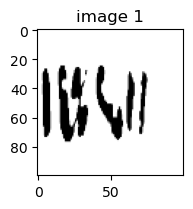

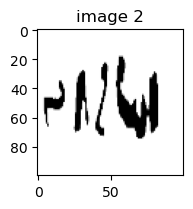

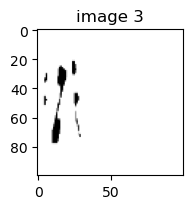

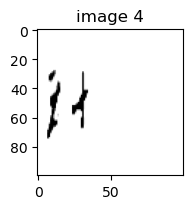

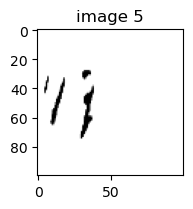

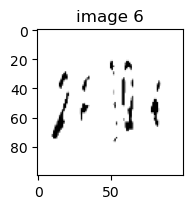

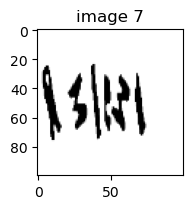

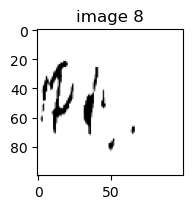

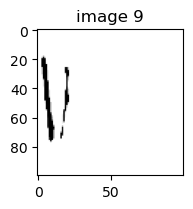

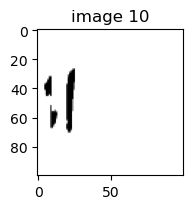

In [62]:
#whitebk using padding CHECKKKKKKKKKKKKKKKKK
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import argparse
import time

def overlap(box1, box2, threshold=0.3):
    # Calculate the intersection area
    x1, y1, w1, h1 = box1
    x2, y2, w2, h2 = box2
    
    xx1 = max(x1, x2)
    yy1 = max(y1, y2)
    xx2 = min(x1 + w1, x2 + w2)
    yy2 = min(y1 + h1, y2 + h2)
    
    if xx2 - xx1 > 0 and yy2 - yy1 > 0:  # If there is an intersection
        inter_area = (xx2 - xx1) * (yy2 - yy1)
        # Calculate the area of both boxes
        box1_area = w1 * h1
        box2_area = w2 * h2
        # Calculate the overlap ratio
        overlap_ratio = inter_area / float(box1_area + box2_area - inter_area)
        return overlap_ratio > threshold
    return False

def pad_character(character, target_size=(100, 100)):
    h, w = character.shape
    target_h, target_w = target_size

    # Calculate padding sizes
    pad_top = (target_h - h) // 2
    pad_bottom = target_h - h - pad_top
    pad_left = (target_w - w) // 2
    pad_right = target_w - w - pad_left

    # Pad the character
    padded_character = np.pad(character, ((pad_top, pad_bottom), (pad_left, pad_right)), mode='constant', constant_values=255)  # Using 255 for white padding
    return padded_character

def calcMser(file,segmented_dir,rst):

    mser = cv2.MSER_create()
    mser.setDelta(1)
    mser.setMaxArea(1500)
    mser.setMinDiversity(0.1) 

    # Detect MSER regions
    regions, _ = mser.detectRegions(rst)
    min_area = 200  # Adjust this value based on your images
    bounding_boxes = []
    # min_area = 100

    for region in regions:
        x, y, w, h = cv2.boundingRect(region)
        area = w * h
        if area > min_area:
            bounding_boxes.append((x, y, w, h))

    # Filter out overlapping bounding boxes
    non_overlapping_boxes = []
    for i in range(len(bounding_boxes)):
        add_box = True
        for j in range(len(non_overlapping_boxes)):
            if overlap(bounding_boxes[i], non_overlapping_boxes[j]):
                add_box = False
                break
        if add_box:
            non_overlapping_boxes.append(bounding_boxes[i])
    
    non_overlapping_boxes.sort(key=lambda box: box[0])  # box[0] is the x-coordinate


    for i, (x, y, w, h) in enumerate(non_overlapping_boxes):
        character = rst[y:y + h, x:x + w]
        if (character.shape[0] == 1) or (character.shape[1] == 1):
            continue
        background = pad_character(character)
        cv2.imwrite(os.path.join(segmented_dir, f'{file[:-4]}_char_{i}.png'), background)

            

def main():
    start_time = time.time()
        
    # Define the directory containing the images
    image_dir = r'C:\Users\daims\Desktop\scalable computing\project_2\captchas'
    image_files = os.listdir(image_dir)
    base_save_path=r'C:\Users\daims\Desktop\scalable computing\project_2\segmented_test'
    os.makedirs(base_save_path, exist_ok=True)

    # Process each image
    for idx,file in enumerate(image_files):
        # print(file)

        # Create the full path to the image file
        image_path = os.path.join(image_dir, file)

        # Load the CAPTCHA image
        image = cv2.imread(image_path)
        
        # Check if the image was loaded successfully
        if image is None:
            print(f"Failed to load image: {image_path}")
            continue
        
        segmented_dir = os.path.join(base_save_path, f'{file}')
        os.makedirs(segmented_dir, exist_ok=True)

        #HERE
        gray_image= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (4,4))
        bw_img=cv2.dilate(gray_image, kernel, iterations=1)
        filtered_img = cv2.GaussianBlur(bw_img, (5, 5), 0)
        _, clean = cv2.threshold(filtered_img, 0, 255, cv2.THRESH_BINARY+ cv2.THRESH_OTSU )

        rst=clean
        
        resized_image = cv2.resize(rst, (100, 100))

        calcMser(file,segmented_dir,resized_image)
        
    # End the timer
    end_time = time.time()

    # Calculate the elapsed time
    elapsed_time = end_time - start_time

    # Log the execution time to a file
    # with open(r'C:\Users\daims\Desktop\scalable computing\project_2\logs\preprocess_test_execution_time_log.txt', 'w') as log_file:
    #     log_file.write(f'Execution time: {elapsed_time:.4f} seconds\n')
       
                
if __name__ == '__main__':
    main()
    
    




530 character shape(50, 138)
resized shape(100, 100)
738 character shape(40, 111)
resized shape(100, 100)
742 character shape(94, 190)
resized shape(100, 100)
877 character shape(56, 131)
resized shape(100, 100)
1128 character shape(54, 103)
resized shape(100, 100)
2163 character shape(94, 190)
resized shape(100, 100)
2496 character shape(94, 190)
resized shape(100, 100)
2536 character shape(94, 190)
resized shape(100, 100)
2602 character shape(94, 190)
resized shape(100, 100)
2618 character shape(58, 101)
resized shape(100, 100)
3626 character shape(45, 118)
resized shape(100, 100)
3999 character shape(94, 190)
resized shape(100, 100)


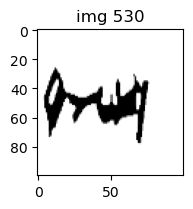

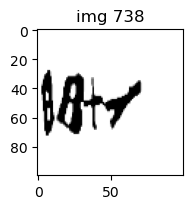

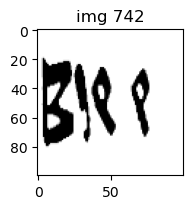

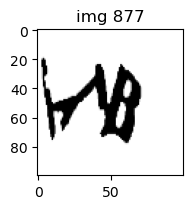

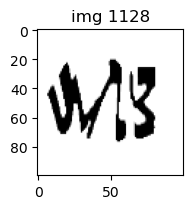

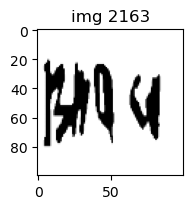

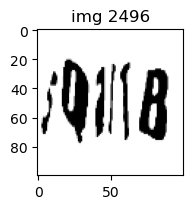

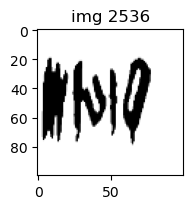

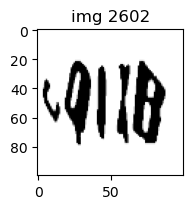

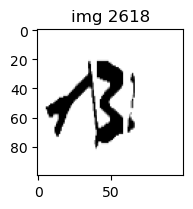

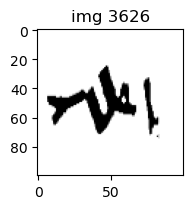

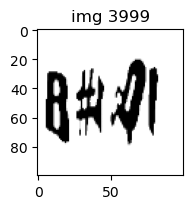

In [46]:
#whitebk using add background
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import argparse



def main():

        
    # Define the directory containing the images
    image_dir = r'C:\Users\daims\Desktop\scalable computing\project_2\captchas'
    image_files = os.listdir(image_dir)
    base_save_path=r'C:\Users\daims\Desktop\scalable computing\project_2\segmented_test'
    os.makedirs(base_save_path, exist_ok=True)

    # Process each image
    for idx,file in enumerate(image_files):
        # print(file)

        # Create the full path to the image file
        image_path = os.path.join(image_dir, file)

        # Load the CAPTCHA image
        image = cv2.imread(image_path)
        
        # Check if the image was loaded successfully
        if image is None:
            print(f"Failed to load image: {image_path}")
            continue

        #HERE
        gray_image= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (4,4))
        bw_img=cv2.dilate(gray_image, kernel, iterations=1)
        filtered_img = cv2.GaussianBlur(bw_img, (5, 5), 0)
        _, clean = cv2.threshold(filtered_img, 0, 255, cv2.THRESH_BINARY+ cv2.THRESH_OTSU )

        rst=clean
        # Create MSER detector
        mser = cv2.MSER_create()
        mser.setDelta(1)

        # Detect MSER regions
        regions, _ = mser.detectRegions(rst)

        
        # Create a directory to save segmented characters for testing
        segmented_dir = os.path.join(base_save_path, f'image_{idx+1}')
        os.makedirs(segmented_dir, exist_ok=True)
        # Set a minimum contour area to filter out small regions
        min_area = 100  # Adjust this value based on your images
        # Iterate through each MSER region
        bounding_boxes=[]
        # Iterate through each MSER region
        for i, region in enumerate(regions):
            # Get bounding box for the region
            x, y, w, h = cv2.boundingRect(region)
            area = w * h                
            # Filter by area
            if area > min_area:
                bounding_boxes.append((x, y, w, h, region))

        # Sort bounding boxes by x-coordinate
        bounding_boxes.sort(key=lambda box: box[0])  # Sort by x coordinate
        
        for i, (x, y, w, h, region) in enumerate(bounding_boxes):
            
            # Extract the character
            character = rst[y:y + h, x:x + w]
            # Save or display the segmented character                    
            # print("Preprocessing for test imgs")
            if(character.shape[0]==1) or (character.shape[1]==1):
                continue
            elif (character.shape[0]>=100) or (character.shape[1]>=100):
                
                print(f'{idx+1}'+' character shape'+f'{character.shape}')
                resized_image = cv2.resize(rst, (100, 100))
                print('resized shape'+f'{resized_image.shape}')
                # #resized_image=cv2.cvtColor(resized_image,cv2.COLOR_BGR2GRAY)
                #change from prev
                # no_circles=remove_circles(resized_image,_minDist=0.1,_param1=1000,_param2=900,_minRadius=0,_maxRadius=1)
                # _, binary = cv2.threshold(no_circles, 160, 255, cv2.THRESH_BINARY)
                plt.figure()
                plt.subplot(131)
                plt.title(f'img {idx+1}')
                plt.imshow(resized_image,cmap='gray')
                secondMser(file,segmented_dir,resized_image)
                
                # #cv2.imwrite(os.path.join(segmented_dir, f'{file[:-4]}_char_{i}.png'), binary)
                
            # else:
                
            #     # print('white')
            #     background=addWhiteBackground(character)
            #     cv2.imwrite(os.path.join(segmented_dir, f'{file[:-4]}_char_{i}.png'), background)
       
                
if __name__ == '__main__':
    main()
    
    




In [ ]:
# #whitebk
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt
# import os
# import argparse

# def remove_circles(img,_minDist=1, _param1=50, _param2=5, _minRadius=0, _maxRadius=2):
#     # pic=img.copy()
#     hough_circle_locations = cv2.HoughCircles(img, method=cv2.HOUGH_GRADIENT, dp=1, minDist=_minDist, param1=_param1, param2=_param2, minRadius=_minRadius, maxRadius=_maxRadius)
#     if hough_circle_locations is not None:
#         circles = hough_circle_locations[0]
#         for circle in circles:
#             x = int(circle[0])
#             y = int(circle[1])
#             r = int(circle[2])
#             surrounding_region1 = img[
#             max(y - r - 1, 0):max(y - r, 0),
#             max(x - r - 1, 0):max(x - r, 0)]
#             # surrounding_region2 = img[
#             # max(y + r , 0):max(y + r+1, 0),
#             # max(x + r , 0):max(x + r+1, 0)]
#             # print(type(surrounding_region1))
#             # print(surrounding_region2.shape)
#             # # Calculate the average color of the surrounding region
#             average_color = cv2.mean(surrounding_region1)[:3]  # Get BGR values np.concatenate((surrounding_region1,surrounding_region2
#             img = cv2.circle(img, center=(x, y), radius=r, color=average_color, thickness=2)#surrounding_color.tolist()
#     return img

# def main():

        
#     # Define the directory containing the images
#     image_dir = r'C:\Users\daims\Desktop\scalable computing\project_2\captchas'
#     image_files = os.listdir(image_dir)
#     base_save_path=r'C:\Users\daims\Desktop\scalable computing\project_2\segmented_test'
#     os.makedirs(base_save_path, exist_ok=True)

#     # Process each image
#     for idx,file in enumerate(image_files[1:20]):
#         # print(file)

#         # Create the full path to the image file
#         image_path = os.path.join(image_dir, file)

#         # Load the CAPTCHA image
#         image = cv2.imread(image_path)
        
#         # Check if the image was loaded successfully
#         if image is None:
#             print(f"Failed to load image: {image_path}")
#             continue

#         #HERE
#         gray_image= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#         kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (4,4))
#         bw_img=cv2.dilate(gray_image, kernel, iterations=1)
#         _, clean = cv2.threshold(bw_img, 0, 255, cv2.THRESH_BINARY+ cv2.THRESH_OTSU )
#         filtered_img = cv2.GaussianBlur(clean, (5, 5), 0)

#         rst=filtered_img
#         plt.figure()
#         plt.subplot(121)
#         plt.title(f'image {idx+1}')
#         plt.imshow(clean,cmap='gray')

#         # Create MSER detector
#         mser = cv2.MSER_create()
#         mser.setDelta(1)

#         # Detect MSER regions
#         regions, _ = mser.detectRegions(rst)

        
#         # Create a directory to save segmented characters for testing
#         segmented_dir = os.path.join(base_save_path, f'image_{idx+1}')
#         os.makedirs(segmented_dir, exist_ok=True)
#         # Set a minimum contour area to filter out small regions
#         min_area = 100  # Adjust this value based on your images
#         # Iterate through each MSER region
#         bounding_boxes=[]
#         # Iterate through each MSER region
#         for i, region in enumerate(regions):
#             # Get bounding box for the region
#             x, y, w, h = cv2.boundingRect(region)
#             area = w * h                
#             # Filter by area
#             if area > min_area:
#                 bounding_boxes.append((x, y, w, h, region))

#         # Sort bounding boxes by x-coordinate
#         bounding_boxes.sort(key=lambda box: box[0])  # Sort by x coordinate
        
#         for i, (x, y, w, h, region) in enumerate(bounding_boxes):
            
#             # Extract the character
#             character = rst[y:y + h, x:x + w]
#             # Save or display the segmented character                    
#             # print("Preprocessing for test imgs")
#             if(character.shape[0]==1) or (character.shape[1]==1):
#                 continue
#             elif (character.shape[0]>=100) or (character.shape[1]>=100):
                
#                 print(f'{idx}'+'character shape'+f'{character.shape}')
#                 resized_image = cv2.resize(character, (100, 100))
#                 print('resized shape'+f'{resized_image.shape}')
#                 # #resized_image=cv2.cvtColor(resized_image,cv2.COLOR_BGR2GRAY)
#                 #change from prev
#                 # no_circles=remove_circles(resized_image,_minDist=0.1,_param1=1000,_param2=900,_minRadius=0,_maxRadius=1)
#                 # _, binary = cv2.threshold(no_circles, 160, 255, cv2.THRESH_BINARY)
#                 plt.figure()
#                 plt.imshow(resized_image,cmap='gray')
#                 secondMser(rst)
#                 # #cv2.imwrite(os.path.join(segmented_dir, f'{file[:-4]}_char_{i}.png'), binary)
                
#             else:
                
#                 # print('white')
#                 background=addWhiteBackground(character)
#                 cv2.imwrite(os.path.join(segmented_dir, f'{file[:-4]}_char_{i}.png'), background)
       
                
# if __name__ == '__main__':
#     main()
    
    




Input image is too large to paste onto the background.
Input image is too large to paste onto the background.


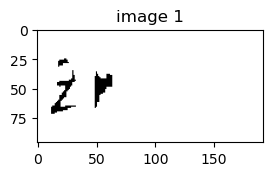

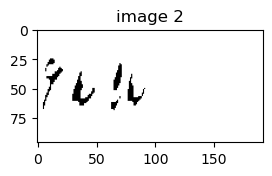

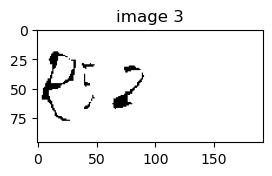

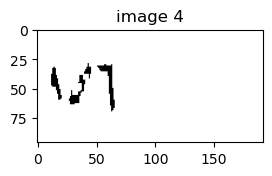

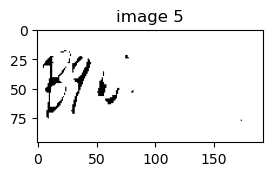

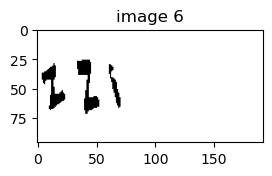

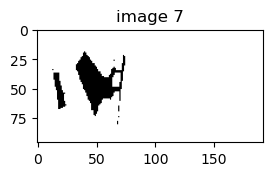

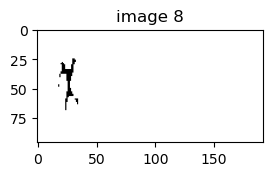

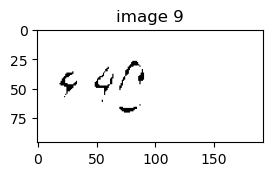

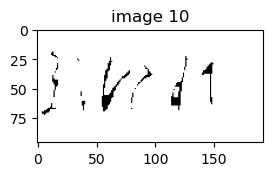

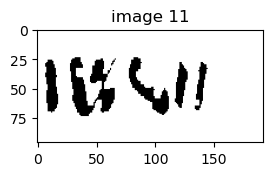

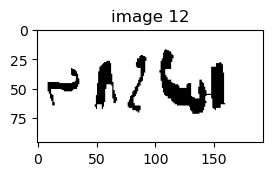

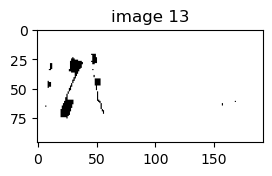

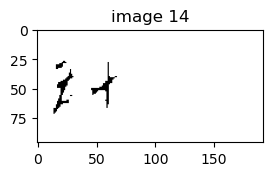

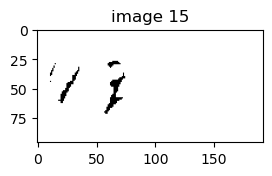

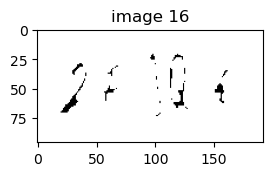

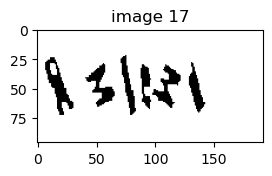

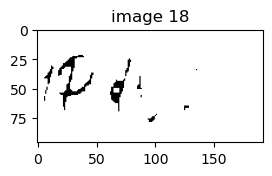

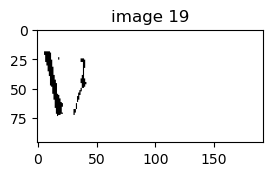

In [19]:
#whitebk supression
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import argparse

def non_max_suppression(boxes, overlapThresh=0.3):
    if len(boxes) == 0:
        return []

    # Convert boxes to float for precision
    boxes = np.array(boxes, dtype="float")
    pick = []

    # Grab the coordinates of the bounding boxes
    x1 = boxes[:, 0]
    y1 = boxes[:, 1]
    x2 = boxes[:, 0] + boxes[:, 2]
    y2 = boxes[:, 1] + boxes[:, 3]

    area = (x2 - x1) * (y2 - y1)
    idxs = np.argsort(y2)

    while len(idxs) > 0:
        last = len(idxs) - 1
        i = idxs[last]
        pick.append(i)

        # Find the coordinates of the intersection
        xx1 = np.maximum(x1[i], x1[idxs[:last]])
        yy1 = np.maximum(y1[i], y1[idxs[:last]])
        xx2 = np.minimum(x2[i], x2[idxs[:last]])
        yy2 = np.minimum(y2[i], y2[idxs[:last]])

        # Compute the width and height of the bounding box
        w = np.maximum(0, xx2 - xx1)
        h = np.maximum(0, yy2 - yy1)

        # Compute the ratio of overlap
        overlap = (w * h) / area[idxs[:last]]

        # Delete all indexes from the index list that have
        # overlap greater than the threshold
        idxs = np.delete(idxs, np.concatenate(([last], np.where(overlap > overlapThresh)[0])))

    return boxes[pick].astype("int")

def main():

        
    # Define the directory containing the images
    image_dir = r'C:\Users\daims\Desktop\scalable computing\project_2\captchas'
    image_files = os.listdir(image_dir)
    base_save_path=r'C:\Users\daims\Desktop\scalable computing\project_2\segmented_test'
    os.makedirs(base_save_path, exist_ok=True)

    # Process each image
    for idx,file in enumerate(image_files[1:20]):
        # print(file)

        # Create the full path to the image file
        image_path = os.path.join(image_dir, file)

        # Load the CAPTCHA image
        image = cv2.imread(image_path)
        
        # Check if the image was loaded successfully
        if image is None:
            print(f"Failed to load image: {image_path}")
            continue

        #HERE
        gray_image= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (4,4))
        bw_img=cv2.dilate(gray_image, kernel, iterations=1)
        _, clean = cv2.threshold(bw_img, 0, 255, cv2.THRESH_BINARY+ cv2.THRESH_OTSU )
        filtered_img = cv2.GaussianBlur(clean, (5, 5), 0)

        rst=filtered_img
        plt.figure()
        plt.subplot(121)
        plt.title(f'image {idx+1}')
        plt.imshow(clean,cmap='gray')

        # Create MSER detector
        mser = cv2.MSER_create()
        mser.setDelta(1)

        # Detect MSER regions
        regions, _ = mser.detectRegions(rst)

        
        # Create a directory to save segmented characters for testing
        segmented_dir = os.path.join(base_save_path, f'image_{idx+1}')
        os.makedirs(segmented_dir, exist_ok=True)
        # Set a minimum contour area to filter out small regions
        min_area = 100  # Adjust this value based on your images
        # Iterate through each MSER region
        bounding_boxes=[]
        # Iterate through each MSER region
        for i, region in enumerate(regions):
            # Get bounding box for the region
            x, y, w, h = cv2.boundingRect(region)
            area = w * h                
            # Filter by area
            if area > min_area:
                bounding_boxes.append((x, y, w, h))

        # Sort bounding boxes by x-coordinate
        # Apply non-maximum suppression
        boxes_after_nms = non_max_suppression(bounding_boxes)

        for i, (x, y, w, h) in enumerate(boxes_after_nms):
            character = clean[y:y + h, x:x + w]
            if (character.shape[0] == 1) or (character.shape[1] == 1):
                continue
            background = addWhiteBackground(character)
            cv2.imwrite(os.path.join(segmented_dir, f'{file[:-4]}_char_{i}.png'), background)
       
                
if __name__ == '__main__':
    main()
    
    




In [ ]:
#########333model train

In [1]:
!pip install -U ultralytics


Defaulting to user installation because normal site-packages is not writeable


In [55]:
from ultralytics import YOLO
model=YOLO('models\epoch5.pt').to('cuda')

In [25]:
results=model(r"segmented_test\image_3999\ffa99dcbb674d41e9183714e88283ba83f6bc900_char_0.png")
results[0].probs.top1
results[0].names



image 1/1 c:\Users\daims\Desktop\scalable computing\project_2\segmented_test\image_3999\ffa99dcbb674d41e9183714e88283ba83f6bc900_char_0.png: 640x640 n 0.34, R 0.21, B 0.20, o 0.14, 8 0.07, 180.5ms
Speed: 37.9ms preprocess, 180.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


{0: '%',
 1: '+',
 2: '1',
 3: '2',
 4: '3',
 5: '4',
 6: '5',
 7: '6',
 8: '7',
 9: '8',
 10: '9',
 11: 'B',
 12: 'C',
 13: 'F',
 14: 'M',
 15: 'P',
 16: 'Q',
 17: 'R',
 18: 'T',
 19: 'U',
 20: 'V',
 21: 'Y',
 22: 'Z',
 23: 'a',
 24: 'close_curly_brace',
 25: 'close_square_bracket',
 26: 'd',
 27: 'dash',
 28: 'e',
 29: 'g',
 30: 'h',
 31: 'hash',
 32: 'j',
 33: 'k',
 34: 'n',
 35: 'o',
 36: 'open_curly_brace',
 37: 'open_square_bracket',
 38: 'pipe',
 39: 's',
 40: 'w',
 41: 'x'}

In [7]:
results = model.train(
    data="train_model_data", 
    epochs=10, 
    imgsz=640,
    project='models',  # Set the project name
    # name=results_name       # Set the results folder name
)

engine\trainer: task=classify, mode=train, model=yolo11s-cls.pt, data=train_model_data, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=models, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False, optimize=False, int8=Fals

2024-10-27 15:27:15,327	INFO util.py:154 -- Outdated packages:
  ipywidgets==7.6.5 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-10-27 15:27:18,063	INFO util.py:154 -- Outdated packages:
  ipywidgets==7.6.5 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.



Overriding model.yaml nc=80 with nc=42

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  1    346112  ultralytics.nn.modules.block.C3k2            [256, 256, 1, True]           
  7                  -1  1   1180672  ultralyti

100%|██████████| 5.35M/5.35M [00:01<00:00, 5.54MB/s]
C:\Users\daims\AppData\Roaming\Python\Python39\site-packages\torch\nn\modules\conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed 


train: Scanning C:\Users\daims\Desktop\scalable computing\project_2\train_model_data\train... 84000 images, 0 corrupt: 100%|██████████| 84000/84000 [00:35<00:00, 2392.32it/s]


train: New cache created: C:\Users\daims\Desktop\scalable computing\project_2\train_model_data\train.cache


val: Scanning C:\Users\daims\Desktop\scalable computing\project_2\train_model_data\val... 21000 images, 0 corrupt: 100%|██████████| 21000/21000 [00:12<00:00, 1617.07it/s]


val: New cache created: C:\Users\daims\Desktop\scalable computing\project_2\train_model_data\val.cache
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 39 weight(decay=0.0), 40 weight(decay=0.0005), 40 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to models\train
Starting training for 10 epochs...

      Epoch    GPU_mem       loss  Instances       Size


  0%|          | 0/5250 [00:00<?, ?it/s]C:\Users\daims\AppData\Roaming\Python\Python39\site-packages\torch\nn\modules\conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
C:\Users\daims\AppData\Roaming\Python\Python39\site-packages\torch\autograd\graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
       1/10      3.26G       3.

100%|██████████| 755k/755k [00:00<00:00, 4.08MB/s]
       1/10      3.26G      3.777         16        640:   8%|▊         | 432/5250 [18:29<3:26:16,  2.57s/it]


KeyboardInterrupt: 

In [8]:
import torch

# Check if GPU is available
print("CUDA Available:", torch.cuda.is_available())
print("Current Device:", torch.cuda.current_device())
print("Device Name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")


CUDA Available: True
Current Device: 0
Device Name: NVIDIA GeForce GTX 1050


In [ ]:
import os
import pandas as pd
from tqdm import tqdm
# import torch
# import cv2


# Define your class name dictionary
class_dict = {
    0: '%', 1: '+', 2: '1', 3: '2', 4: '3', 5: '4', 6: '5', 7: '6',
    8: '7', 9: '8', 10: '9', 11: 'B', 12: 'C', 13: 'F', 14: 'M',
    15: 'P', 16: 'Q', 17: 'R', 18: 'T', 19: 'U', 20: 'V', 21: 'Y',
    22: 'Z', 23: 'a', 24: '}', 25: ']',
    26: 'd', 27: '-', 28: 'e', 29: 'g', 30: 'h', 31: '#',
    32: 'j', 33: 'k', 34: 'n', 35: 'o', 36: '{',
    37: '[', 38: '|', 39: 's', 40: 'w', 41: 'x'
}

csvFile=[]
# Define the parent folder containing subfolders with images
parent_folder_path = r'C:\Users\daims\Desktop\scalable computing\project_2\segmented_test'
parent_folder=os.listdir(parent_folder_path)
# Loop through each subfolder in the parent folder
# print(parent_folder[3000:3020])
for subfolder in tqdm(parent_folder):
    print(subfolder)
    subfolder_path = os.path.join(parent_folder_path, subfolder)
    captcha="" 

   
    for filename in os.listdir(subfolder_path):
        image_path = os.path.join(subfolder_path, filename)
        # Run inference
        results = model(image_path)
        captcha=captcha+ class_dict[results[0].probs.top1]

    csvFile.append((subfolder,captcha))
    # print(f'\n\n\nImage: {subfolder}, Predicted captcha: {captcha}\n\n\n\n')

df = pd.DataFrame(csvFile)
df.to_csv(r'C:\Users\daims\Desktop\scalable computing\project_2\daim5.csv', columns=None,index=False)

In [58]:
model = YOLO(r"C:\Users\daims\Desktop\scalable computing\project_2\models\epoch5.pt")
model.export(format="onnx",
                imgsz=640,simplify=True)

Ultralytics 8.3.23  Python-3.9.13 torch-2.3.0+cu118 CPU (Intel Core(TM) i7-7700HQ 2.80GHz)
YOLO11s-cls summary (fused): 112 layers, 5,487,930 parameters, 0 gradients, 12.0 GFLOPs

PyTorch: starting from 'C:\Users\daims\Desktop\scalable computing\project_2\models\epoch5.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 42) (31.7 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 14.5/14.5 MB 4.9 MB/s eta 0:00:00
     -------------------------------------- 140.4/140.4 kB 2.8 MB/s eta 0:00:00
     -------------------------------------- 226.4/226.4 MB 4.6 MB/s eta 0:00:00
     ---------------------------------------- 46.0/46.0 kB ? eta 0:00:00
     ---------------------------------------- 86.8/86.8 kB 4.8 MB/s eta 0:00:00
     ---------------------------------------- 83.2/83.2

'C:\\Users\\daims\\Desktop\\scalable computing\\project_2\\models\\epoch5.onnx'

In [60]:
model_t=YOLO(r'models\epoch5.onnx',task='classify')

In [62]:
pp=model_t(r'C:\Users\daims\Desktop\scalable computing\project_2\segmented_test\0a5fa27cd73647398d6a3a031824b90af6b4760f.png\0a5fa27cd73647398d6a3a031824b90af6b4760f_char_0.png')


image 1/1 C:\Users\daims\Desktop\scalable computing\project_2\segmented_test\0a5fa27cd73647398d6a3a031824b90af6b4760f.png\0a5fa27cd73647398d6a3a031824b90af6b4760f_char_0.png: 640x640 U 0.98, Q 0.01, o 0.00, 8 0.00, C 0.00, 313.2ms
Speed: 157.6ms preprocess, 313.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


In [63]:
class_dict[pp[0].probs.top1]

'U'

In [26]:
class_dict = {
    0: '%', 1: '+', 2: '1', 3: '2', 4: '3', 5: '4', 6: '5', 7: '6',
    8: '7', 9: '8', 10: '9', 11: 'B', 12: 'C', 13: 'F', 14: 'M',
    15: 'P', 16: 'Q', 17: 'R', 18: 'T', 19: 'U', 20: 'V', 21: 'Y',
    22: 'Z', 23: 'a', 24: '}', 25: ']',
    26: 'd', 27: '-', 28: 'e', 29: 'g', 30: 'h', 31: '#',
    32: 'j', 33: 'k', 34: 'n', 35: 'o', 36: '{',
    37: '[', 38: '|', 39: 's', 40: 'w', 41: 'x'
}

In [30]:
class_dict[results[0].probs.top1]

'n'